<a href="https://colab.research.google.com/github/Mai-Binh-Nam/Hand-on_DataAnalysisVEF/blob/master/%5BStudents%5D_Lecture_4_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization and Preliminary analysis of Seller onboarding process

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
# Option to specify the default size of plots by seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Orders
orders = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_order_payments_dataset.csv')

# Customers and Sellers
customers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_customers_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_sellers_dataset.csv')

# Products and Categories
products = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_products_dataset.csv')
product_translation = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/product_category_name_translation.csv')

In [ ]:
order_items.groupby("order_item_id").agg(min=("price","min"),
                                         mean=("price","mean"),
                                         max=("price","max"),
                                         mod=("price",
                                        lambda x: x.value_counts().index[0]))

,min,mean,max,mod
order_item_id,,,,
1,0.85,125.964327,6735.00,59.90
2,0.85,85.456052,2299.95,59.90
3,1.20,78.004534,1790.00,59.90
4,1.20,77.243161,1790.00,59.90
5,1.20,75.561978,1680.00,59.90
6,1.20,76.165508,1680.00,59.90
7,1.20,100.711897,1680.00,59.90
8,1.20,120.766944,1680.00,29.99
9,1.20,80.356071,284.99,29.99


## Evaluate the deal closing process

In [ ]:
# Marketing Funnel dataset
qualified_leads = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_marketing_qualified_leads_dataset.csv')
closed_deals = pd.read_csv('https://raw.githubusercontent.com/thuynh386/olist_ecommerce_dataset/master/olist_closed_deals_dataset.csv')

In [ ]:
onboard_sellers = pd.merge(qualified_leads, closed_deals, on="mql_id", how="left")

In [ ]:
onboard_sellers.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [ ]:
# Create the month of first contact with potential sellers
onboard_sellers["first_contact_date"] = pd.to_datetime(onboard_sellers["first_contact_date"])
onboard_sellers["first_contact_month"] = onboard_sellers["first_contact_date"].astype('datetime64[M]')

In [ ]:
# Calculate the time to convert a lead to a new sellers
onboard_sellers["won_date"] = pd.to_datetime(onboard_sellers["won_date"])
onboard_sellers["won_date"] = onboard_sellers["won_date"].dt.normalize()
onboard_sellers["convert_time"] = (onboard_sellers["won_date"] - onboard_sellers["first_contact_date"]).dt.days

### Visualize the conversion rate

In [ ]:
onboard_sellers.loc[pd.isnull(onboard_sellers["seller_id"])==True, "converted"] = 0
onboard_sellers.loc[pd.isnull(onboard_sellers["seller_id"])==False, "converted"] = 1

In [ ]:
lead_cr = onboard_sellers.groupby(["origin","first_contact_month"]).agg({"mql_id":"nunique",
                                       "converted":"sum",
                                       "convert_time":"mean"
                                       })

In [ ]:
# Calculate conversion rate
lead_cr["CR"] = lead_cr["converted"] * 100.0 / lead_cr["mql_id"]

In [ ]:
# With groupby above, the lead_cr dataframe are indexed by 2 columns: origin & first_contact_month. 
# Therefore, we use reset_index() to turn these 2 indices into columns

lead_cr.reset_index(inplace=True)

In [ ]:
lead_cr.tail()

,origin,first_contact_month,mql_id,converted,convert_time,CR
108,unknown,2018-01-01,151,33.0,41.363636,21.854305
109,unknown,2018-02-01,156,34.0,31.823529,21.794872
110,unknown,2018-03-01,186,40.0,29.250000,21.505376
111,unknown,2018-04-01,166,35.0,15.342857,21.084337
112,unknown,2018-05-01,154,26.0,9.192308,16.883117


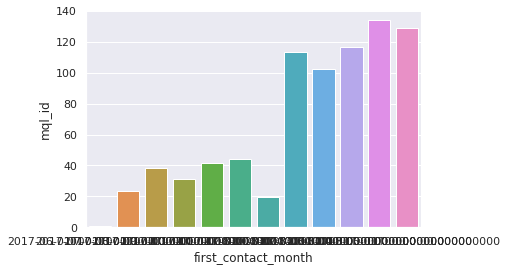

In [ ]:
# Visualize the number of qualified leads
sns.barplot(data=lead_cr, x="first_contact_month", y="mql_id", ci=None)

In [ ]:
# Change the format of first contact month for a more beautiful chart
# New format: YYYY-mm
lead_cr["first_contact_month_YM"] = [x.strftime("%Y-%m") for x in lead_cr["first_contact_month"]]
lead_cr.sort_values("first_contact_month_YM", inplace=True)

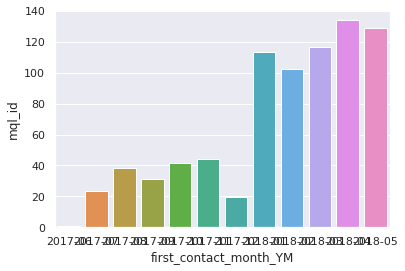

In [ ]:
# Visualize the number of qualified leads
sns.barplot(data=lead_cr, x="first_contact_month_YM", y="mql_id", hue=None, ci=None)

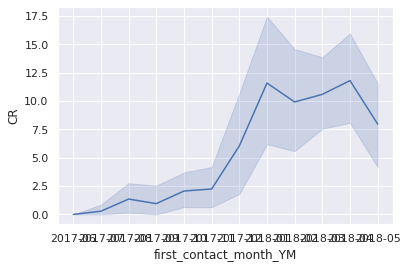

In [ ]:
# Overall conversion rate by month of first contact
sns.lineplot(data=lead_cr, x="first_contact_month_YM", y="CR")

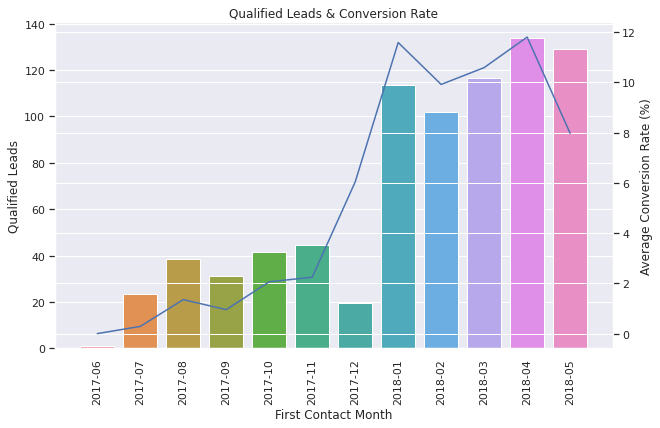

In [ ]:
# Combine bar chart and line chart together
fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(data=lead_cr, x="first_contact_month_YM", y="mql_id", palette=None, ci=None)
ax1.set_title("Qualified Leads & Conversion Rate")
ax1.set_xlabel("First Contact Month")
ax1.set_ylabel("Qualified Leads")

# Adjust the labels on x-axis
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=lead_cr, x="first_contact_month_YM", y="CR", err_style=None)
ax2.set_ylabel("Average Conversion Rate (%)")

plt.show()

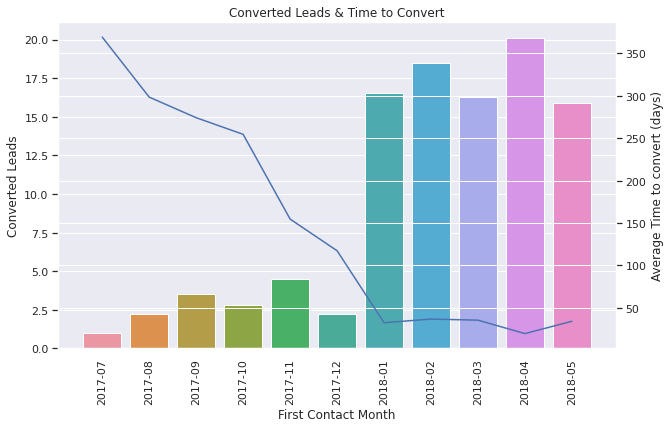

In [ ]:
# Combine bar chart and line chart together
fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(data=lead_cr[lead_cr["converted"]!=0], x="first_contact_month_YM", y="converted", palette=None, ci=None)
ax1.set_title("Converted Leads & Time to Convert")
ax1.set_xlabel("First Contact Month")
ax1.set_ylabel("Converted Leads")

# Adjust the labels on x-axis
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=lead_cr[lead_cr["converted"]!=0], x="first_contact_month_YM", y="convert_time", err_style=None)
ax2.set_ylabel("Average Time to convert (days)")

plt.show()

Text(0, 0.5, 'Qualified Leads')

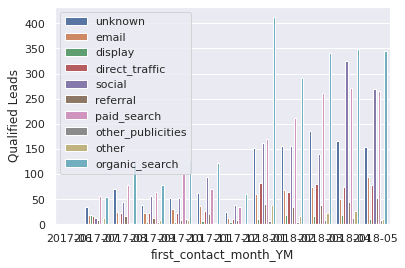

In [ ]:
# Visualize the number of qualified leads by source
fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=lead_cr, x="first_contact_month_YM", y="mql_id", hue="origin")

plt.legend(loc='upper left')
ax1.set_ylabel("Qualified Leads")

Text(0, 0.5, 'Qualified Leads')

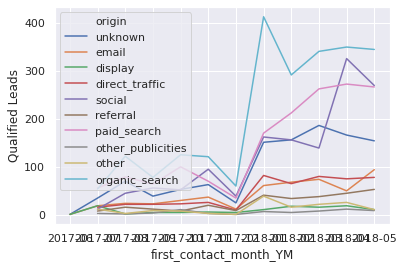

In [ ]:
# Visualize the number of qualified leads by source
fig, ax1 = plt.subplots()

ax1 = sns.lineplot(data=lead_cr, x="first_contact_month_YM", y="mql_id", hue="origin", ci=None)

plt.legend(loc='upper left')
ax1.set_ylabel("Qualified Leads")

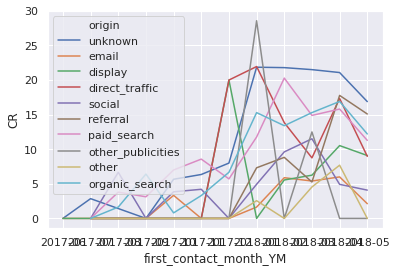

In [ ]:
# Conversion rate by Lead source
sns.lineplot(data=lead_cr, x="first_contact_month_YM", y="CR", hue="origin")

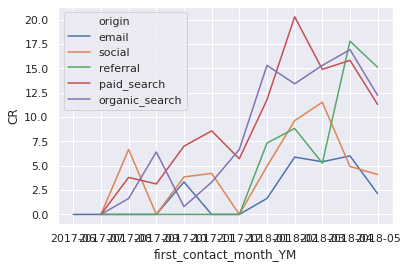

In [ ]:
sns.lineplot(data=lead_cr[lead_cr["origin"].isin(["email","social","paid_search","organic_search","referral"])], 
            x="first_contact_month_YM", 
            y="CR", 
            hue="origin")

## Exercises: Selling sellers
As noted, we are interested not only in onboarding sellers but also helping them to actually sell products. In other words, sellers' ability to sell can be an important KPI for onboarding team.

First, let's see if data about these sellers' sales are available.

In [ ]:
# Data on orders are available for which period?
orders["order_purchase_timestamp"].agg(["min","max"])

min    2016-09-04 21:15:19
max    2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

In [ ]:
# Data on new sellers are available for which period?
closed_deals.won_date.agg(["min","max"])

min    2017-12-05 02:00:00
max    2018-11-14 18:04:19
Name: won_date, dtype: object

As you can see, we have sales data up to 2018-10-17 while the last seller was onboarded on 2018-11-14. 

**Let's assume that we are at 2018-10-17 and we need to analyze the performance of sellers who were onboarded from 2018-01-01 to 2018-08-31.**

Use your knowledge of Python (dataframe subsetting, joining) to answer the following questions.

### Question 1: How many among onboarded sellers have at least 1 order before 2018-08-31, in total?

In [ ]:
onboard_sellers['won_date'] = pd.to_datetime(onboard_sellers['won_date'])

## Apply conditions on onboarded date to extract the list of new sellers we are interested in
onboard_sellers_filter = onboard_sellers[(onboard_sellers['won_date']<= pd.Timestamp(2018,8,31)) &
                                         (onboard_sellers['won_date']>= pd.Timestamp(2018,1,1))]

onboard_sellers_filter.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,convert_time
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-01,5.0
12,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,34.0
14,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,63.0
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-01,3.0
67,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-01,267.0


In [ ]:
onboard_sellers_filter.agg({"won_date":["min","max"]})

,won_date
min,2018-01-08
max,2018-08-30


In [ ]:

# In order to spot out only sellers with at least 1 order, we can use inner join.
# If using (left or) right join, you will have to count unique the number of orders and set a condition on that: nb_unique_order >= 1.
# But we will have information on non-selling sellers too, which can be used for other purposes.
sellers_order = pd.merge(order_items[['order_id', 'seller_id','product_id']], 
                         onboard_sellers_filter, on='seller_id', how='right')

# Reset index to turn the groupby into a column
sellers_agg = sellers_order.groupby(["seller_id"]).agg({"order_id": "nunique"}).reset_index()

In [ ]:
sellers_order.head()

,order_id,seller_id,product_id,mql_id,first_contact_date,landing_page_id,origin,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,convert_time
0,0005f50442cb953dcd1d21e1fb923495,ba143b05f0110f0dc71ad71b4466ce92,4535b0e1091c278dfd193e5a1d63b39f,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0
1,01c1644529b18608f086d2ff0f3b8181,ba143b05f0110f0dc71ad71b4466ce92,8b41f2becf919f6177cca1ff15dfd311,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0
2,034fe9142b806fe19c1cbc1c752ab08d,ba143b05f0110f0dc71ad71b4466ce92,20fb650ad1615624d7e202031400f695,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0
3,03d6e874e44c091359a3ad62f2bec233,ba143b05f0110f0dc71ad71b4466ce92,173e9fe34bfe97f3a5e6dc57fe897b74,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0
4,07c33a9470d0df2a30cc8a8ebd0288d1,ba143b05f0110f0dc71ad71b4466ce92,8ac47b3ab13c68f49f10dde899674149,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0


In [ ]:
sellers_agg.head()

,seller_id,order_id
0,00065220becb8785e2cf78355eb9bf68,0
1,01266d4c46afa519678d16a8b683d325,3
2,013d100f608a64ec8275c038aedeb064,0
3,01fd077212124329bac32490e8ef80d9,31
4,0255dc67cb6bad298606136951ab1877,0


In [ ]:
# Group by seller_id, we will have the same count and count unique 
sellers_agg.loc[sellers_agg["order_id"] > 0]['seller_id'].agg(["nunique","count"])

nunique    379
count      379
Name: seller_id, dtype: int64

### Question 2: How many among onboarded sellers have at least 1 order before 2018-08-31, grouped by month of their onboarding (win month)?

Visualize the results.

In [ ]:
## Create variable "won_month"
sellers_order["won_month"] = sellers_order["won_date"].astype('datetime64[M]')

In [ ]:
sellers_order.head()

,order_id,seller_id,product_id,mql_id,first_contact_date,landing_page_id,origin,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,convert_time,won_month
0,0005f50442cb953dcd1d21e1fb923495,ba143b05f0110f0dc71ad71b4466ce92,4535b0e1091c278dfd193e5a1d63b39f,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0,2018-04-01
1,01c1644529b18608f086d2ff0f3b8181,ba143b05f0110f0dc71ad71b4466ce92,8b41f2becf919f6177cca1ff15dfd311,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0,2018-04-01
2,034fe9142b806fe19c1cbc1c752ab08d,ba143b05f0110f0dc71ad71b4466ce92,20fb650ad1615624d7e202031400f695,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0,2018-04-01
3,03d6e874e44c091359a3ad62f2bec233,ba143b05f0110f0dc71ad71b4466ce92,173e9fe34bfe97f3a5e6dc57fe897b74,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0,2018-04-01
4,07c33a9470d0df2a30cc8a8ebd0288d1,ba143b05f0110f0dc71ad71b4466ce92,8ac47b3ab13c68f49f10dde899674149,cfccca319397a5ea2bb11bd90b0d925d,2018-04-17,5dc848e7dd9418dffe183215b8ff0bc1,paid_search,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-17,books,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-01,0.0,2018-04-01


In [ ]:
## Aggregate the number of orders for each seller.
## Group by won_month besides seller_id actually does not affect the result table size
# as each seller is linked to its own won month which is unique.

sellers_agg_2 = sellers_order.groupby(["seller_id", "won_month"]).agg({"order_id": "nunique"}).reset_index()

sellers_agg_2.head()

,seller_id,won_month,order_id
0,00065220becb8785e2cf78355eb9bf68,2018-07-01,0
1,01266d4c46afa519678d16a8b683d325,2018-05-01,3
2,013d100f608a64ec8275c038aedeb064,2018-04-01,0
3,01fd077212124329bac32490e8ef80d9,2018-03-01,31
4,0255dc67cb6bad298606136951ab1877,2018-03-01,0


In [ ]:
# Write your code here
# Calculate total onboarded sellers and selling sellers, then join them together.

result_2 = pd.merge(sellers_agg_2.groupby("won_month").agg({"seller_id":"nunique"}).reset_index().rename(columns={"seller_id":"total_sellers"}),
                    sellers_agg_2[sellers_agg_2["order_id"]>0].groupby("won_month").agg({"seller_id":"nunique"}).reset_index().rename(columns={"seller_id":"selling_sellers"}),
                    on="won_month", how="left")

result_2["selling_ratio"] = result_2["selling_sellers"] * 100.0 / result_2["total_sellers"]

result_2.head(10)
# result_2.columns = ["won_month", "total_seller"]

,won_month,total_sellers,selling_sellers,selling_ratio
0,2018-01-01,73,41,56.164384
1,2018-02-01,113,61,53.982301
2,2018-03-01,147,74,50.340136
3,2018-04-01,207,104,50.241546
4,2018-05-01,122,64,52.459016
5,2018-06-01,57,23,40.350877
6,2018-07-01,37,10,27.027027
7,2018-08-01,33,2,6.060606


In [ ]:
result_2["Month"] = [x.strftime("%Y-%m") for x in result_2["won_month"]]

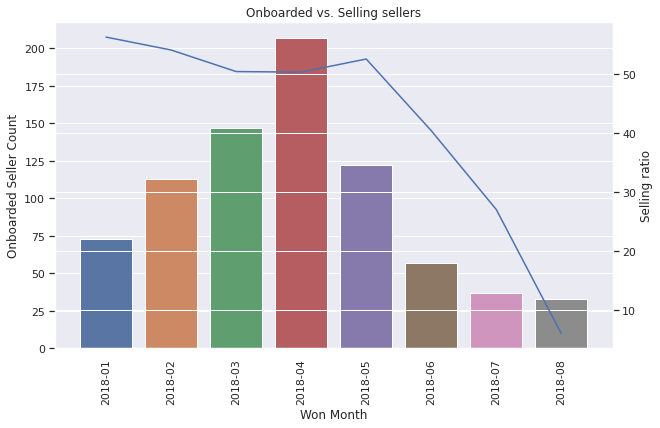

In [ ]:
# Combine bar chart and line chart together
fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(data=result_2, x="Month", y="total_sellers", palette=None, ci=None)
ax1.set_title("Onboarded vs. Selling sellers")
ax1.set_xlabel("Won Month")
ax1.set_ylabel("Onboarded Seller Count")

# Adjust the labels on x-axis
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=result_2, x="Month", y="selling_ratio", palette=None, ci=None)
ax2.set_ylabel("Selling ratio")

plt.show()

### Question 3: How many among onboarded sellers have at least 1 order before 2018-08-31, grouped by month of their onboarding (win month) and their main category?

Visualize the results.

In [ ]:
# We will use business segment information to group by, 
# therefore we need to make sure there is no missing values for this variable.

sellers_order["business_segment"].fillna("Unknown", inplace=True)

In [ ]:
sellers_agg_3 = sellers_order.groupby(["seller_id", "won_month", "business_segment"]).agg({"order_id": "nunique"}).reset_index()

sellers_agg_3.head()

,seller_id,won_month,business_segment,order_id
0,00065220becb8785e2cf78355eb9bf68,2018-07-01,handcrafted,0
1,01266d4c46afa519678d16a8b683d325,2018-05-01,construction_tools_house_garden,3
2,013d100f608a64ec8275c038aedeb064,2018-04-01,food_supplement,0
3,01fd077212124329bac32490e8ef80d9,2018-03-01,household_utilities,31
4,0255dc67cb6bad298606136951ab1877,2018-03-01,computers,0


In [ ]:
sellers_agg_3["business_segment"].unique()

array(['handcrafted', 'construction_tools_house_garden',
       'food_supplement', 'household_utilities', 'computers',
       'phone_mobile', 'sports_leisure', 'food_drink', 'home_decor',
       'pet', 'audio_video_electronics', 'health_beauty',
       'fashion_accessories', 'stationery', 'bed_bath_table',
       'car_accessories', 'party', 'bags_backpacks', 'books',
       'home_appliances', 'toys', 'games_consoles', 'music_instruments',
       'watches', 'air_conditioning', 'small_appliances', 'baby',
       'home_office_furniture', 'jewerly', 'perfume', 'gifts', 'Unknown',
       'religious'], dtype=object)

In [ ]:
result_3 = pd.merge(sellers_agg_3.groupby(["won_month","business_segment"]).agg({"seller_id":"nunique"}).reset_index().rename(columns={"seller_id":"total_sellers"}),
                    sellers_agg_3.loc[sellers_agg_3["order_id"] > 0].groupby(["won_month","business_segment"]).agg({"seller_id":"nunique"}).reset_index().rename(columns={"seller_id":"selling_sellers"}),
                    on=["won_month","business_segment"],
                    how="left")

result_3["selling_ratio"] = result_3["selling_sellers"] * 100.0 / result_3["total_sellers"]

result_3["Month"] = [x.strftime("%Y-%m") for x in result_3["won_month"]]

In [ ]:
# Sort from largest to smallest by number of selling sellers
result_3.sort_values("total_sellers", ascending=False).head(10)

,won_month,business_segment,total_sellers,selling_sellers,selling_ratio,Month
92,2018-04-01,home_decor,29,13.0,44.827586,2018-04
82,2018-04-01,car_accessories,25,9.0,36.000000,2018-04
117,2018-05-01,health_beauty,20,10.0,50.000000,2018-05
90,2018-04-01,health_beauty,19,12.0,63.157895,2018-04
65,2018-03-01,home_decor,18,8.0,44.444444,2018-03
94,2018-04-01,household_utilities,18,10.0,55.555556,2018-04
77,2018-04-01,audio_video_electronics,18,10.0,55.555556,2018-04
64,2018-03-01,health_beauty,16,9.0,56.250000,2018-03
58,2018-03-01,construction_tools_house_garden,16,8.0,50.000000,2018-03
110,2018-05-01,car_accessories,16,8.0,50.000000,2018-05


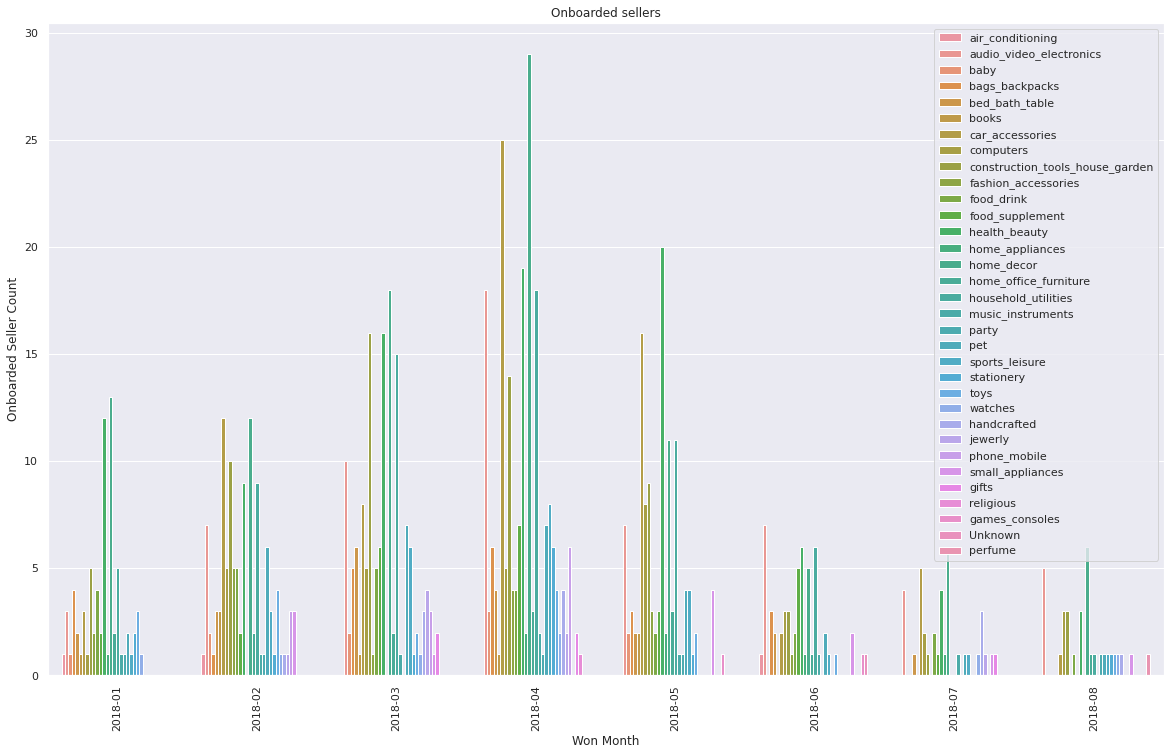

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,12))
ax1 = sns.barplot(data=result_3, x="Month", y="total_sellers", hue="business_segment")
ax1.set_title("Onboarded sellers")
ax1.set_xlabel("Won Month")
ax1.set_ylabel("Onboarded Seller Count")

# Adjust the labels on x-axis
plt.xticks(rotation=90)
plt.legend(loc="upper right")

plt.show()

### Question 4: How many among onboarded sellers could have at least 1 orders within their first 30 days with Olist, grouped by month of their onboarding (win month)?

In [ ]:
# Write your code here





### Question 5: Assume that Olist collect 2.5% on the sales values of all sellers. What is the revenue that Olist has collected from these new sellers (onboarded in from 2018-01-01 to 2018-08-31), grouped by sales month and their main category?

In [ ]:
onboard_sellers.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,convert_time,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01,NaN,0.0
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-01,NaN,0.0
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-01,NaN,0.0
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,NaN,0.0
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-01,5.0,1.0


In [ ]:
onboard_sellers['won_date'] = pd.to_datetime(onboard_sellers['won_date'])

onboard_sellers_filter = onboard_sellers[(onboard_sellers['won_date']>= pd.Timestamp(2018,1,1)) &  
                                          (onboard_sellers['won_date']<= pd.Timestamp(2018,1,31))]
onboard_sellers_filter.head()                                          

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,convert_time,converted
39,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-01,3.0,1.0
225,9878253904482726e741460a99adba86,2018-01-22,22c29808c4f815213303f8933030604c,organic_search,92d46311e4fa7583d14c351fdc881af6,de63de0d10a6012430098db33c679b0b,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-26,food_supplement,industry,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-01-01,4.0,1.0
720,77abef21c838da55e14ffc88016ce91f,2018-01-05,22c29808c4f815213303f8933030604c,organic_search,eba08391609dfda5c016fdd264f9383b,068066e24f0c643eb1d089c7dd20cd73,6565aa9ce3178a5caf6171827af3a9ba,2018-01-12,home_decor,online_medium,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-01,7.0,1.0
768,5985e72b3752e4749926885db1b45be4,2018-01-23,b76ef37428e6799c421989521c0e5077,unknown,044668ccd5316b12a7cf0d54a156e3e9,56bf83c4bb35763a51c2baab501b4c67,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-31,food_drink,offline,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-01,8.0,1.0
830,e5f15cc640c8a7408103dd190ced966c,2018-01-03,b76ef37428e6799c421989521c0e5077,unknown,30a81d8cf85fb2ada1b1b094c9583a95,068066e24f0c643eb1d089c7dd20cd73,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-19,pet,online_top,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-01,16.0,1.0


In [ ]:
# Write your code here
sellers_order = pd.merge(order_items[['order_id', 'seller_id', 'product_id', 'freight_value']], 
                         orders[['order_id', 'order_approved_at']], 
                         on='order_id', how='inner')
sellers_product = pd.merge(sellers_order, products[['product_id','product_category_name']])

onboard_sellers_product = pd.merge(sellers_product, onboard_sellers_filter[['seller_id','won_date']],
                                   on='seller_id', how='inner')
onboard_sellers_product['olist_rev'] = onboard_sellers_product['freight_value']*0.025
onboard_sellers_product.head()

onboard_sellers_product['order_approved_at_YM'] = pd.to_datetime(sellers_product['order_approved_at']).dt.to_period('M')
onboard_sellers_product.head()

onboard_sellers_agg = onboard_sellers_product.groupby(["order_approved_at_YM", "product_category_name"]).agg({"olist_rev": "sum"})
onboard_sellers_agg['olist_rev'].head()



order_approved_at_YM  product_category_name
2017-02               cama_mesa_banho          0.35875
                      utilidades_domesticas    0.53150
2017-03               bebes                    0.54750
                      beleza_saude             2.95575
                      cama_mesa_banho          0.68725
Name: olist_rev, dtype: float64